In [11]:
import pandas as pd
import numpy as np
import sys
from hicpep import peptools

np.set_printoptions(suppress=True)
np.set_printoptions(precision=6)
np.set_printoptions(threshold=sys.maxsize)

In [12]:
# How to convert between correlation and covariance matrices
# https://blogs.sas.com/content/iml/2010/12/10/converting-between-correlation-and-covariance-matrices.html
import numpy as np

x = np.array([
    [1, -0.2, 0.3],
    [0.4, -0.5, 0.6],
    [0.7, 0.8, 0.9]
])

cov = np.cov(x, bias=True)
corr = np.corrcoef(x)
std = np.std(x, axis=1)

d = np.diag(std)
s = d @ corr @ d

print(cov, '\n')
print(s, '\n')

[[ 0.242222  0.165556 -0.023333]
 [ 0.165556  0.228889  0.006667]
 [-0.023333  0.006667  0.006667]] 

[[ 0.242222  0.165556 -0.023333]
 [ 0.165556  0.228889  0.006667]
 [-0.023333  0.006667  0.006667]] 



In [15]:
import numpy as np

x = np.array([
    [10, 0, 3],
    [0, 5, 0],
    [3, 0, 9]
])

x = x.astype("float64") # Sparse
x -= x.mean(axis=1, keepdims=True)
n = len(x[0])

std = np.std(x, axis=1)
std = np.array([std])
std_mat = std.T @ std # Dense, but can be stored as an 1D array.

cov = x @ x.T / n
corr = (x @ x.T / std_mat) / n # Dense

corr -= corr.mean(axis=1, keepdims=True)
corr_cov = corr @ corr.T / n

print(corr_cov, '\n')
print(np.cov(corr, bias=True), '\n')

[[ 0.499745 -0.494024  0.240547]
 [-0.494024  0.675702 -0.510899]
 [ 0.240547 -0.510899  0.513936]] 

[[ 0.499745 -0.494024  0.240547]
 [-0.494024  0.675702 -0.510899]
 [ 0.240547 -0.510899  0.513936]] 



In [3]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

def generate_pearson(n:int):
    # Create a nxn array with random positive values
    matrix_np = np.abs(np.random.randn(n, n) * 10)  # Use absolute values for positive entries
    # Make the array symmetric
    matrix_np = matrix_np + matrix_np.T

    pearson_np = np.corrcoef(matrix_np)
    # Subtract the mean of each row to center the data
    return pearson_np 

pearson_np = generate_pearson(n=250)

<Axes: >

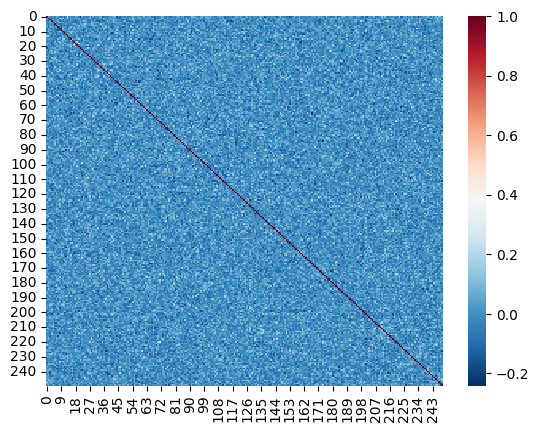

In [10]:
ax = plt.axes()
sns.heatmap(pearson_np, ax=ax, cmap="RdBu_r")

<Axes: >

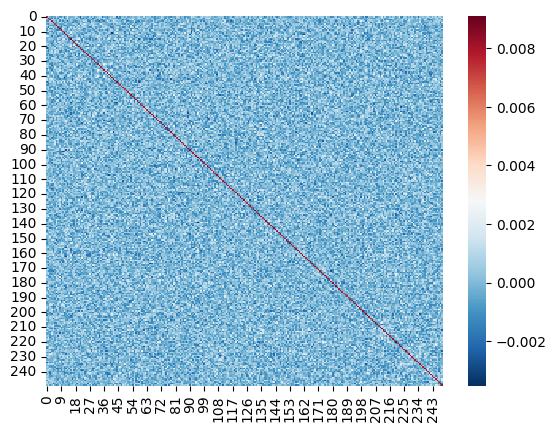

In [11]:
ax2 = plt.axes()
sns.heatmap(np.cov(pearson_np, bias=True), ax=ax2, cmap="RdBu_r")

In [21]:
import numpy as np

def generate_pearson(n:int):
    # Create a nxn array with random positive values
    matrix_np = np.abs(np.random.randn(n, n) * 10)  # Use absolute values for positive entries
    # Make the array symmetric
    matrix_np = matrix_np + matrix_np.T

    pearson_np = np.corrcoef(matrix_np)
    # Subtract the mean of each row to center the data
    return pearson_np 

pearson_np = generate_pearson(n=10)

pearson_np -= pearson_np.mean(axis=1, keepdims=True)
cov_np = np.cov(pearson_np, bias=True)

tmp1 = pearson_np @ pearson_np[0].T / len(pearson_np[0])

print(tmp1, '\n')
print(cov_np[0], '\n')

[ 0.14034898 -0.04621186  0.0052245   0.07571766  0.0581121  -0.11609069
  0.09089568  0.05497828 -0.04564171  0.0166893 ] 

[ 0.14034898 -0.04621186  0.0052245   0.07571766  0.0581121  -0.11609069
  0.09089568  0.05497828 -0.04564171  0.0166893 ] 



In [45]:
import numpy as np
from hicpep import peptools
from sklearn.decomposition import PCA

# def generate_pearson(n:int):
#     # Create a nxn array with random positive values
#     matrix_np = np.abs(np.random.randn(n, n) * 10)  # Use absolute values for positive entries
#     # Make the array symmetric
#     matrix_np = matrix_np + matrix_np.T

#     pearson_np = np.corrcoef(matrix_np)
#     # Subtract the mean of each row to center the data
#     return pearson_np 

# pearson_np = generate_pearson(n=1000)

pearson_np = peptools.read_pearson(pearson="/home/jordan990301/Projects/HiCPEP/test/gm12878_1000000_pearson_chr1.txt")
pearson_np = pearson_np.astype('float64')
diag = np.diag(pearson_np)
diag_valid = ~np.isnan(diag)
ixgrid = np.ix_(diag_valid, diag_valid) # Extract the submatrix.
pearson_np = pearson_np[ixgrid]

est_np = peptools.create_est(pearson_np=pearson_np, sampleing_proportion=0.1)

pca = PCA(n_components=1)
pca.fit(pearson_np)
pc1_np = pca.components_[0]

est_np = -est_np

a = peptools.calc_similarity(pc1_np=pc1_np, est_np=est_np)
b = pca.explained_variance_

print(a, '\n')
print(b, '\n')

{'total_entry_num': 230, 'valid_entry_num': 230, 'similar_num': 228, 'similar_rate': 0.991304347826087} 

[51.62553958] 



In [12]:
import numpy as np
from hicpep import peptools
from sklearn.decomposition import PCA

def generate_pearson(n:int):
    # Create a nxn array with random positive values
    matrix_np = np.abs(np.random.randn(n, n) * 10)  # Use absolute values for positive entries
    # Make the array symmetric
    matrix_np = matrix_np + matrix_np.T

    pearson_np = np.corrcoef(matrix_np)
    # Subtract the mean of each row to center the data
    return pearson_np 

pearson_np = generate_pearson(n=6)
pearson_np -= pearson_np.mean(axis=1, keepdims=True)

a = pearson_np @ pearson_np.T / len(pearson_np)
b = np.cov(pearson_np, bias=True)

print(a, '\n')
print(b, '\n')

[[ 0.38684714  0.29755843 -0.32435865 -0.40636978  0.10996276 -0.37426977]
 [ 0.29755843  0.37454537 -0.27601945 -0.36952378 -0.0769115  -0.25268388]
 [-0.32435865 -0.27601945  0.30970281  0.36373152 -0.05713485  0.33387625]
 [-0.40636978 -0.36952378  0.36373152  0.46295421 -0.0603916   0.38960389]
 [ 0.10996276 -0.0769115  -0.05713485 -0.0603916   0.22300473 -0.1414101 ]
 [-0.37426977 -0.25268388  0.33387625  0.38960389 -0.1414101   0.3934959 ]] 

[[ 0.38684714  0.29755843 -0.32435865 -0.40636978  0.10996276 -0.37426977]
 [ 0.29755843  0.37454537 -0.27601945 -0.36952378 -0.0769115  -0.25268388]
 [-0.32435865 -0.27601945  0.30970281  0.36373152 -0.05713485  0.33387625]
 [-0.40636978 -0.36952378  0.36373152  0.46295421 -0.0603916   0.38960389]
 [ 0.10996276 -0.0769115  -0.05713485 -0.0603916   0.22300473 -0.1414101 ]
 [-0.37426977 -0.25268388  0.33387625  0.38960389 -0.1414101   0.3934959 ]] 



In [1]:
import numpy as np
import pandas as pd
from hicpep import peptools
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

pearson_np = peptools.read_pearson(pearson="/home/jordan990301/Projects/HiCPEP/test/gm12878_1000000_pearson_chr1.txt")
pc1_df = pd.read_table("/home/jordan990301/Projects/HiCPEP/test/gm12878_1000000_pc1_chr1.txt", header=None)
pc1_np = pc1_df.values.flatten()
est_np = peptools.create_est(pearson_np=pearson_np)

pc1_np = pc1_np[~np.isnan(pc1_np)]
est_np = est_np[~np.isnan(est_np)]

peptools.plot_comparison(
    pc1_np=pc1_np,
    est_np=est_np,
    scatter="/home/jordan990301/Projects/HiCPEP/test/scatter.png",
    relative_magnitude="/home/jordan990301/Projects/HiCPEP/test/relative_magnitude.png",
)


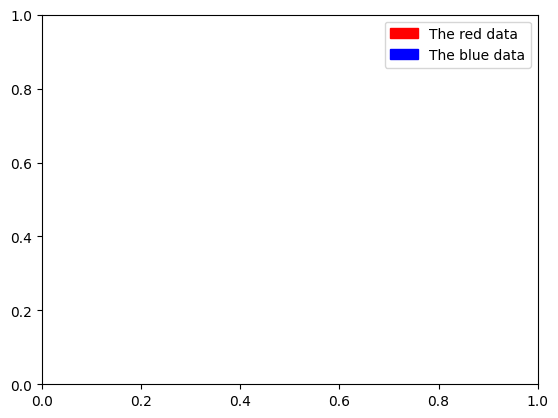

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
red_patch = mpatches.Patch(color='red', label='The red data')
blue_patch = mpatches.Patch(color='blue', label='The blue data')
ax.legend(handles=[red_patch, blue_patch])

plt.show()

In [6]:
import numpy as np
from hicpep import peptools

pearson_np = peptools.straw_to_pearson(
    hic_path="https://hicfiles.s3.amazonaws.com/hiseq/ch12-lx-b-lymphoblasts/in-situ/combined.hic", # Path to the Juicer's `.hic` file.
    chrom="chrX", 
    resolution=1000000,
    normalization="KR",
)

/home/jordan990301/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/jordan990301/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [28]:
import numpy as np

a = np.array([
    [1, np.nan, 2],
    [np.nan, np.nan, np.nan],
    [3, np.nan, 4],
])

diag = np.diag(a)
diag_valid = ~np.isnan(diag)
ixgrid = np.ix_(diag_valid, diag_valid) 

a = a[ixgrid]

tmp = np.full((len(diag_valid), len(diag_valid)), np.nan)
tmp[ixgrid] = a

array([ 1., nan,  4.])

In [23]:
import numpy as np
from copy import deepcopy

a = np.array([
    [1,   2],
    [2,   1],
])

def test(a):
    a = deepcopy(a)
    a[0] = 100
    print(a)

test(a=a)
print(a)


[[100 100]
 [  2   1]]
[[1 2]
 [2 1]]
